# Importing the data

In [3]:
import pandas as pd


file_path = 'Data.csv'
data = pd.read_csv(file_path)

df = pd.DataFrame(data)


data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                489 non-null    object 
 1   Applicant ID             500 non-null    int64  
 2   Job Experience Required  500 non-null    object 
 3   Key Skills               500 non-null    object 
 4   Role Category            463 non-null    object 
 5   Location                 489 non-null    object 
 6   Functional Area          489 non-null    object 
 7   Industry                 489 non-null    object 
 8   Role                     486 non-null    object 
 9   Longitude                473 non-null    float64
 10  Latitude                 473 non-null    float64
 11  sal                      500 non-null    int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 47.0+ KB


(                                           Job Title  Applicant ID  \
 0                              Digital Media Planner             1   
 1                           Online Bidding Executive             2   
 2   Trainee Research/ Research Executive- Hi- Tec...             3   
 3                                  Technical Support             4   
 4                  Software Test Engineer -hyderabad             5   
 
   Job Experience Required                                         Key Skills  \
 0              5 - 10 yrs                      Media Planning| Digital Media   
 1               2 - 5 yrs   pre sales| closing| software knowledge| clien...   
 2               0 - 1 yrs   Computer science| Fabrication| Quality check|...   
 3               0 - 5 yrs                                  Technical Support   
 4               2 - 5 yrs   manual testing| test engineering| test cases|...   
 
                                 Role Category   Location  \
 0                     

# Stemming the Data

In [4]:
# Download required NLTK resources
import nltk
nltk.download('punkt_tab')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd


# Initialize the Porter Stemmer
stemmer = PorterStemmer()

def stem_text(text):
    if pd.isnull(text):  
        return ""
    words = word_tokenize(text)  
    stemmed_words = [stemmer.stem(word) for word in words] 
    return " ".join(stemmed_words)  

# Apply stemming to the relevant columns for predciction of Job Role
for column in ['Job Title', 'Key Skills', 'Functional Area','Role Category' ]:
    df[f'{column} Stemmed'] = df[column].apply(stem_text)


df[['Job Title', 'Job Title Stemmed', 'Key Skills', 'Key Skills Stemmed', 'Functional Area', 'Functional Area Stemmed','Role Category','Role Category Stemmed']].head()


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Job Title  \
0                              Digital Media Planner   
1                           Online Bidding Executive   
2   Trainee Research/ Research Executive- Hi- Tec...   
3                                  Technical Support   
4                  Software Test Engineer -hyderabad   

                                   Job Title Stemmed  \
0                                digit media planner   
1                                   onlin bid execut   
2  traine research/ research executive- hi- tech ...   
3                                    technic support   
4                      softwar test engin -hyderabad   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1   pre sales| closing| software knowledge| clien...   
2   Computer science| Fabrication| Quality check|...   
3                                  Technical Support   
4   manual testing| test engineering| test cases|...   

                                  Key Skills Stemmed  \
0                        media planning| digit media   
1  pre sales| closing| softwar knowledge| clients...   
2  comput science| fabrication| qualiti check| in...   
3                                    technic support   
4  manual testing| test engineering| test cases| ...   

                                     Functional Area  \
0  Marketing , Advertising , MR , PR , Media Plan...   
1              Sales , Retail , Business Development   
2                           Engineering Design , R&D   
3  IT Software - Application Programming , Mainte...   
4                         IT Software - QA & Testing   

                    Functional Area Stemmed  \
0  market , advertis , mr , pr , media plan   
1              sale , retail , busi develop   
2                      engin design , r & d   
3     it softwar - applic program , mainten   
4                    it softwar - qa & test   

                                Role Category  \
0                                 Advertising   
1                                Retail Sales   
2                                         R&D   
3  Admin/Maintenance/Security/Datawarehousing   
4                        Programming & Design   

                  Role Category Stemmed  
0                              advertis  
1                           retail sale  
2                                 r & d  
3  admin/maintenance/security/datawareh  
4                      program & design

# Normalising the Salary and Adjusting maximum and minimum Experience


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['sal_normalized'] = scaler.fit_transform(data[['sal']])

df[['min_experience', 'max_experience']] = data['Job Experience Required'].str.extract(r'(\d+)\s*-\s*(\d+)').astype(float)



# Taking the preprocessed Column and droping the orignal columns

In [6]:

df['Job Title'] = df['Job Title Stemmed']
df['Functional Area'] = df['Functional Area Stemmed']
df['Key Skills'] = df['Key Skills Stemmed']
df['Role Category'] = df['Role Category Stemmed']


df.drop(['Job Title Stemmed', 'Functional Area Stemmed','Key Skills Stemmed','Role Category Stemmed'], axis=1, inplace=True)



In [8]:
df_cleaned = df.dropna(subset=['Job Title', 'Role Category', 'Functional Area', 'Key Skills'], how='all')
df_cleaned1 = df_cleaned.dropna(subset=['Role'])
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                486 non-null    object 
 1   Applicant ID             486 non-null    int64  
 2   Job Experience Required  486 non-null    object 
 3   Key Skills               486 non-null    object 
 4   Role Category            486 non-null    object 
 5   Location                 486 non-null    object 
 6   Functional Area          486 non-null    object 
 7   Industry                 486 non-null    object 
 8   Role                     486 non-null    object 
 9   Longitude                459 non-null    float64
 10  Latitude                 459 non-null    float64
 11  sal                      486 non-null    int64  
 12  sal_normalized           486 non-null    float64
 13  min_experience           486 non-null    float64
 14  max_experience           486 no

# IDF Vectorization

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer


columns_to_vectorize = ['Job Title', 'Functional Area', 'Key Skills', 'Role Category']

vectorizers = {col: TfidfVectorizer() for col in columns_to_vectorize}

# Transform each column
idf_vectors = {}
for col in columns_to_vectorize:
    idf_vectors[col] = vectorizers[col].fit_transform(df_cleaned1[col].fillna(""))

#Concatenating all the vectors into one matrix
from scipy.sparse import hstack
combined_idf_vector = hstack([idf_vectors[col] for col in columns_to_vectorize])


print(idf_vectors['Job Title'])  # Sparse matrix for 'Job Title'
print(combined_idf_vector)       # Combined sparse matrix


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2154 stored elements and shape (486, 766)>
  Coords	Values
  (0, 225)	0.4882606347969171
  (0, 450)	0.5686245281240289
  (0, 538)	0.6620178989449131
  (1, 503)	0.6640815875922913
  (1, 111)	0.6640815875922913
  (1, 267)	0.3434986026780953
  (2, 710)	0.3531897998693059
  (2, 597)	0.7063795997386118
  (2, 268)	0.30404791624820043
  (2, 332)	0.376706109878592
  (2, 683)	0.25984504557937055
  (2, 509)	0.27278700488571406
  (3, 685)	0.7027945616208835
  (3, 671)	0.7113928620362381
  (4, 648)	0.4926085438407425
  (4, 693)	0.6020289215230081
  (4, 259)	0.358993916073228
  (4, 349)	0.5157725936954726
  (5, 507)	0.3486268772732622
  (5, 287)	0.24694954277877396
  (5, 29)	0.5587221552350018
  (5, 44)	0.5587221552350018
  (5, 652)	0.43947051125548536
  (6, 287)	0.2329984027023458
  (6, 609)	0.4942493408450334
  :	:
  (481, 685)	0.266169750936162
  (481, 187)	0.2935187098944045
  (481, 247)	0.36834755272148834
  (481, 94)	0.316864319815

# Logistic Regression

In [10]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt



X = combined_idf_vector  
y = df_cleaned1['Role']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Without PCA and Feature Engineering - Classification Report:")
report_dict = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.expand_frame_repr', False)

print(report_df)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()




Without PCA and Feature Engineering - Classification Report:
                                                                                                      precision    recall  f1-score    support
Accounts Executive/Accountant                                                                          0.714286  1.000000  0.833333   5.000000
Accounts Manager                                                                                       0.000000  0.000000  0.000000   1.000000
Architect                                                                                              0.500000  0.333333  0.400000   3.000000
Area Sales Manager                                                                                     0.000000  0.000000  0.000000   1.000000
Associate/Senior Associate -(NonTechnical)                                                             0.666667  1.000000  0.800000   6.000000
Associate/Senior Associate -(Technical)                                          

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

Heat Map 


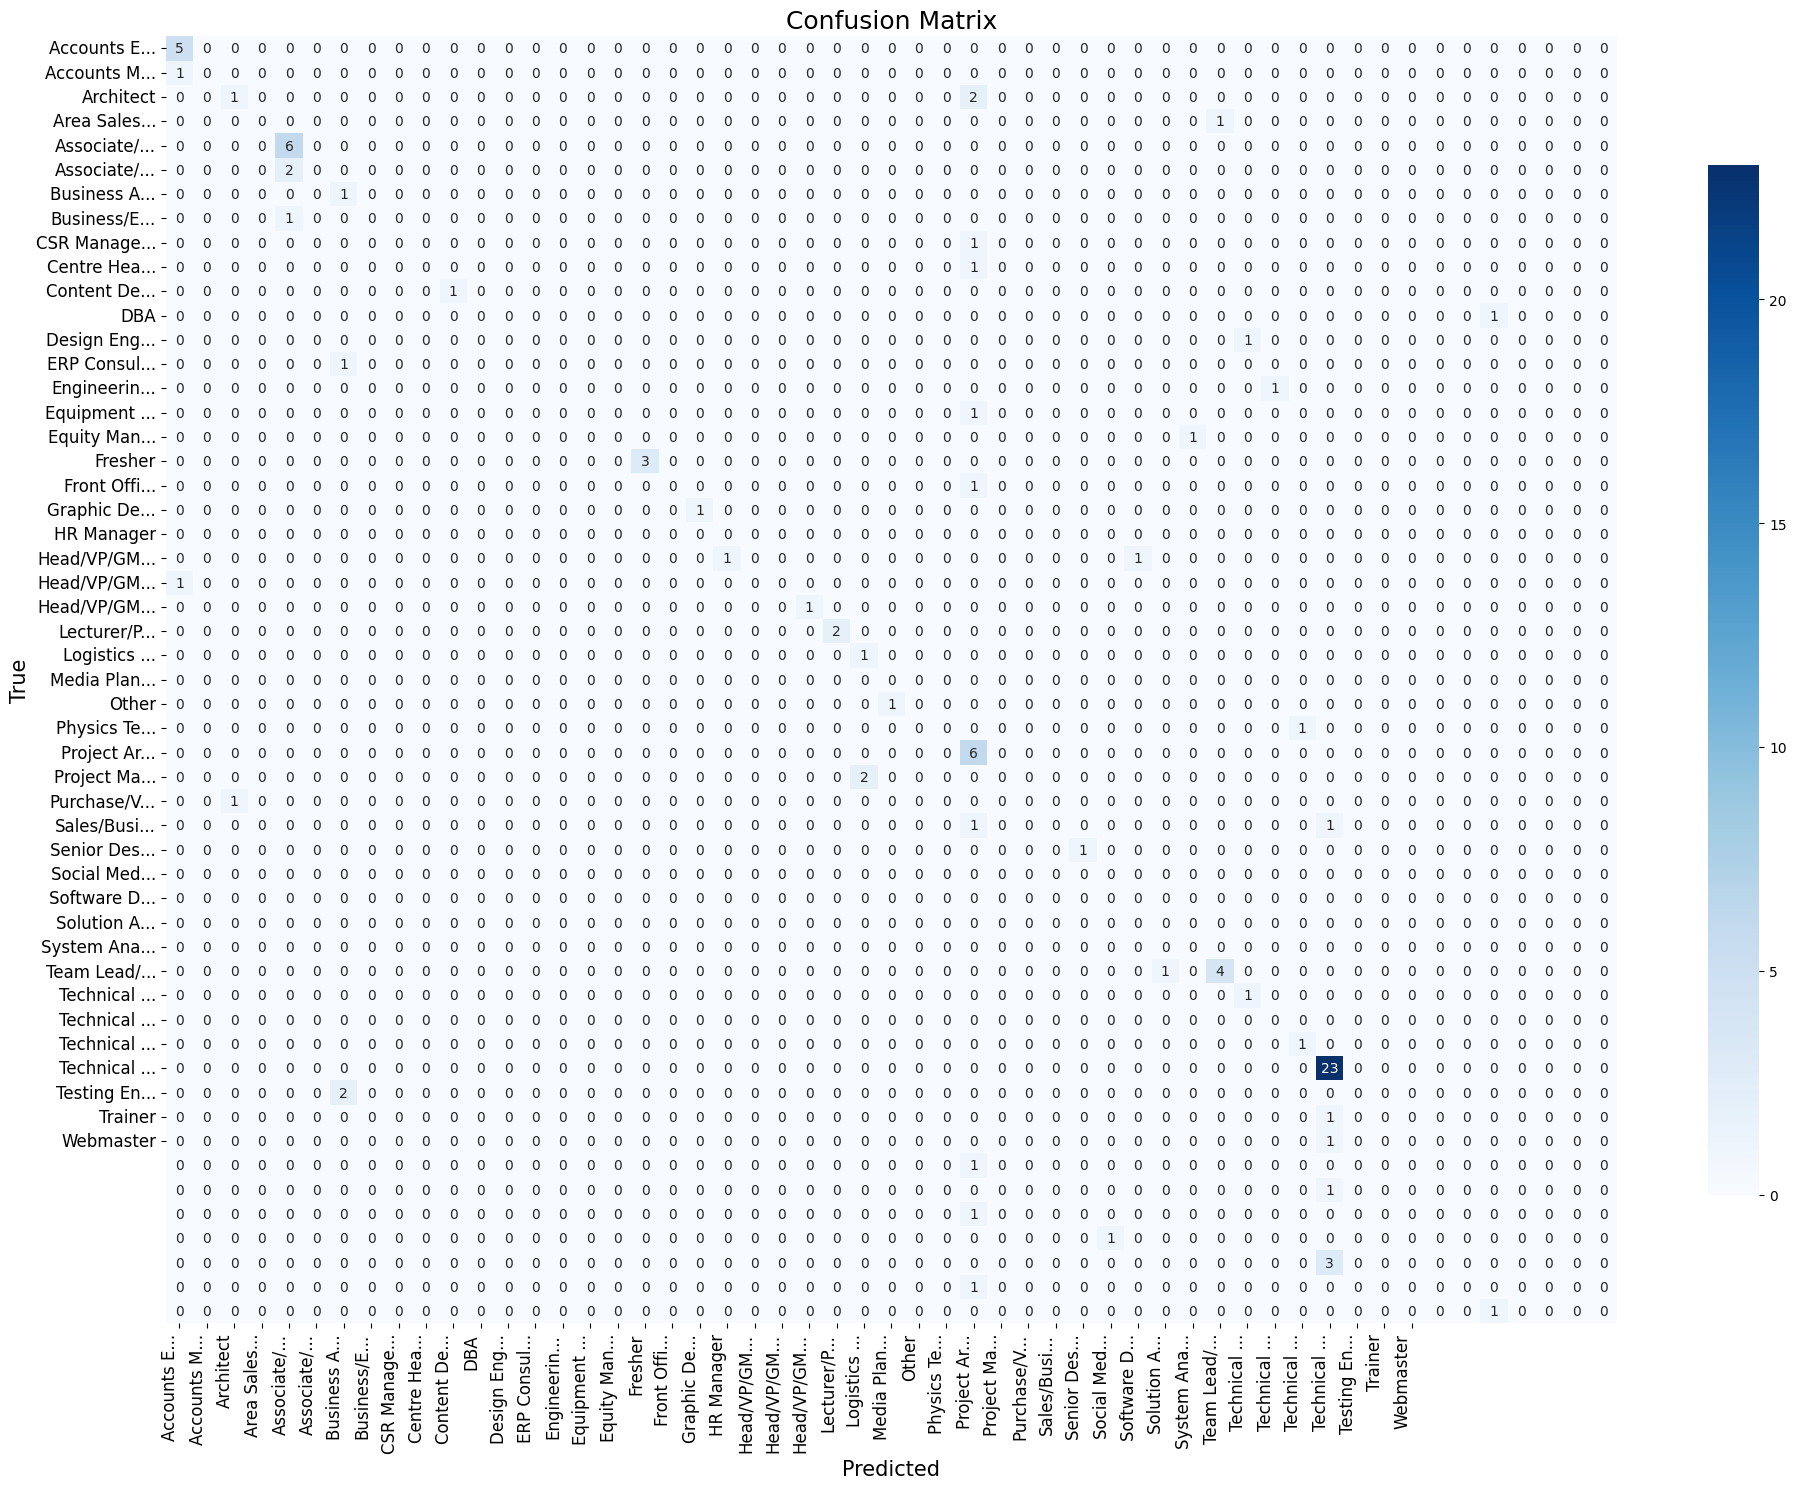

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


labels = [label[:10] + "..." if len(label) > 10 else label for label in sorted(y_test.unique())]


plt.figure(figsize=(20, 15))  
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, cbar_kws={"shrink": 0.8})  


plt.xticks(fontsize=12, ha='right')  
plt.yticks(fontsize=12)


plt.xlabel("Predicted", fontsize=15)
plt.ylabel("True", fontsize=15)
plt.title("Confusion Matrix", fontsize=18)

plt.tight_layout()
plt.show()

Logistic Regression with PCA


In [ ]:
from sklearn.decomposition import PCA


y = df_cleaned1['Role']  
X = combined_idf_vector


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.85)  
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())


model = LogisticRegression(max_iter=500)
model.fit(X_train_pca, y_train)


y_pred = model.predict(X_test_pca)


print("Classification Report:")
report_dict = classification_report(y_test, y_pred, output_dict=True)


report_df = pd.DataFrame(report_dict).transpose()


pd.set_option('display.max_colwidth', 100)
pd.set_option('display.expand_frame_repr', False)

print(report_df)

print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
                                                                                                      precision    recall  f1-score    support
Accounts Executive/Accountant                                                                          0.714286  1.000000  0.833333   5.000000
Accounts Manager                                                                                       0.000000  0.000000  0.000000   1.000000
Architect                                                                                              0.500000  0.333333  0.400000   3.000000
Area Sales Manager                                                                                     0.000000  0.000000  0.000000   1.000000
Associate/Senior Associate -(NonTechnical)                                                             0.666667  1.000000  0.800000   6.000000
Associate/Senior Associate -(Technical)                                                                0.000000  0.0000

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

Heat Map


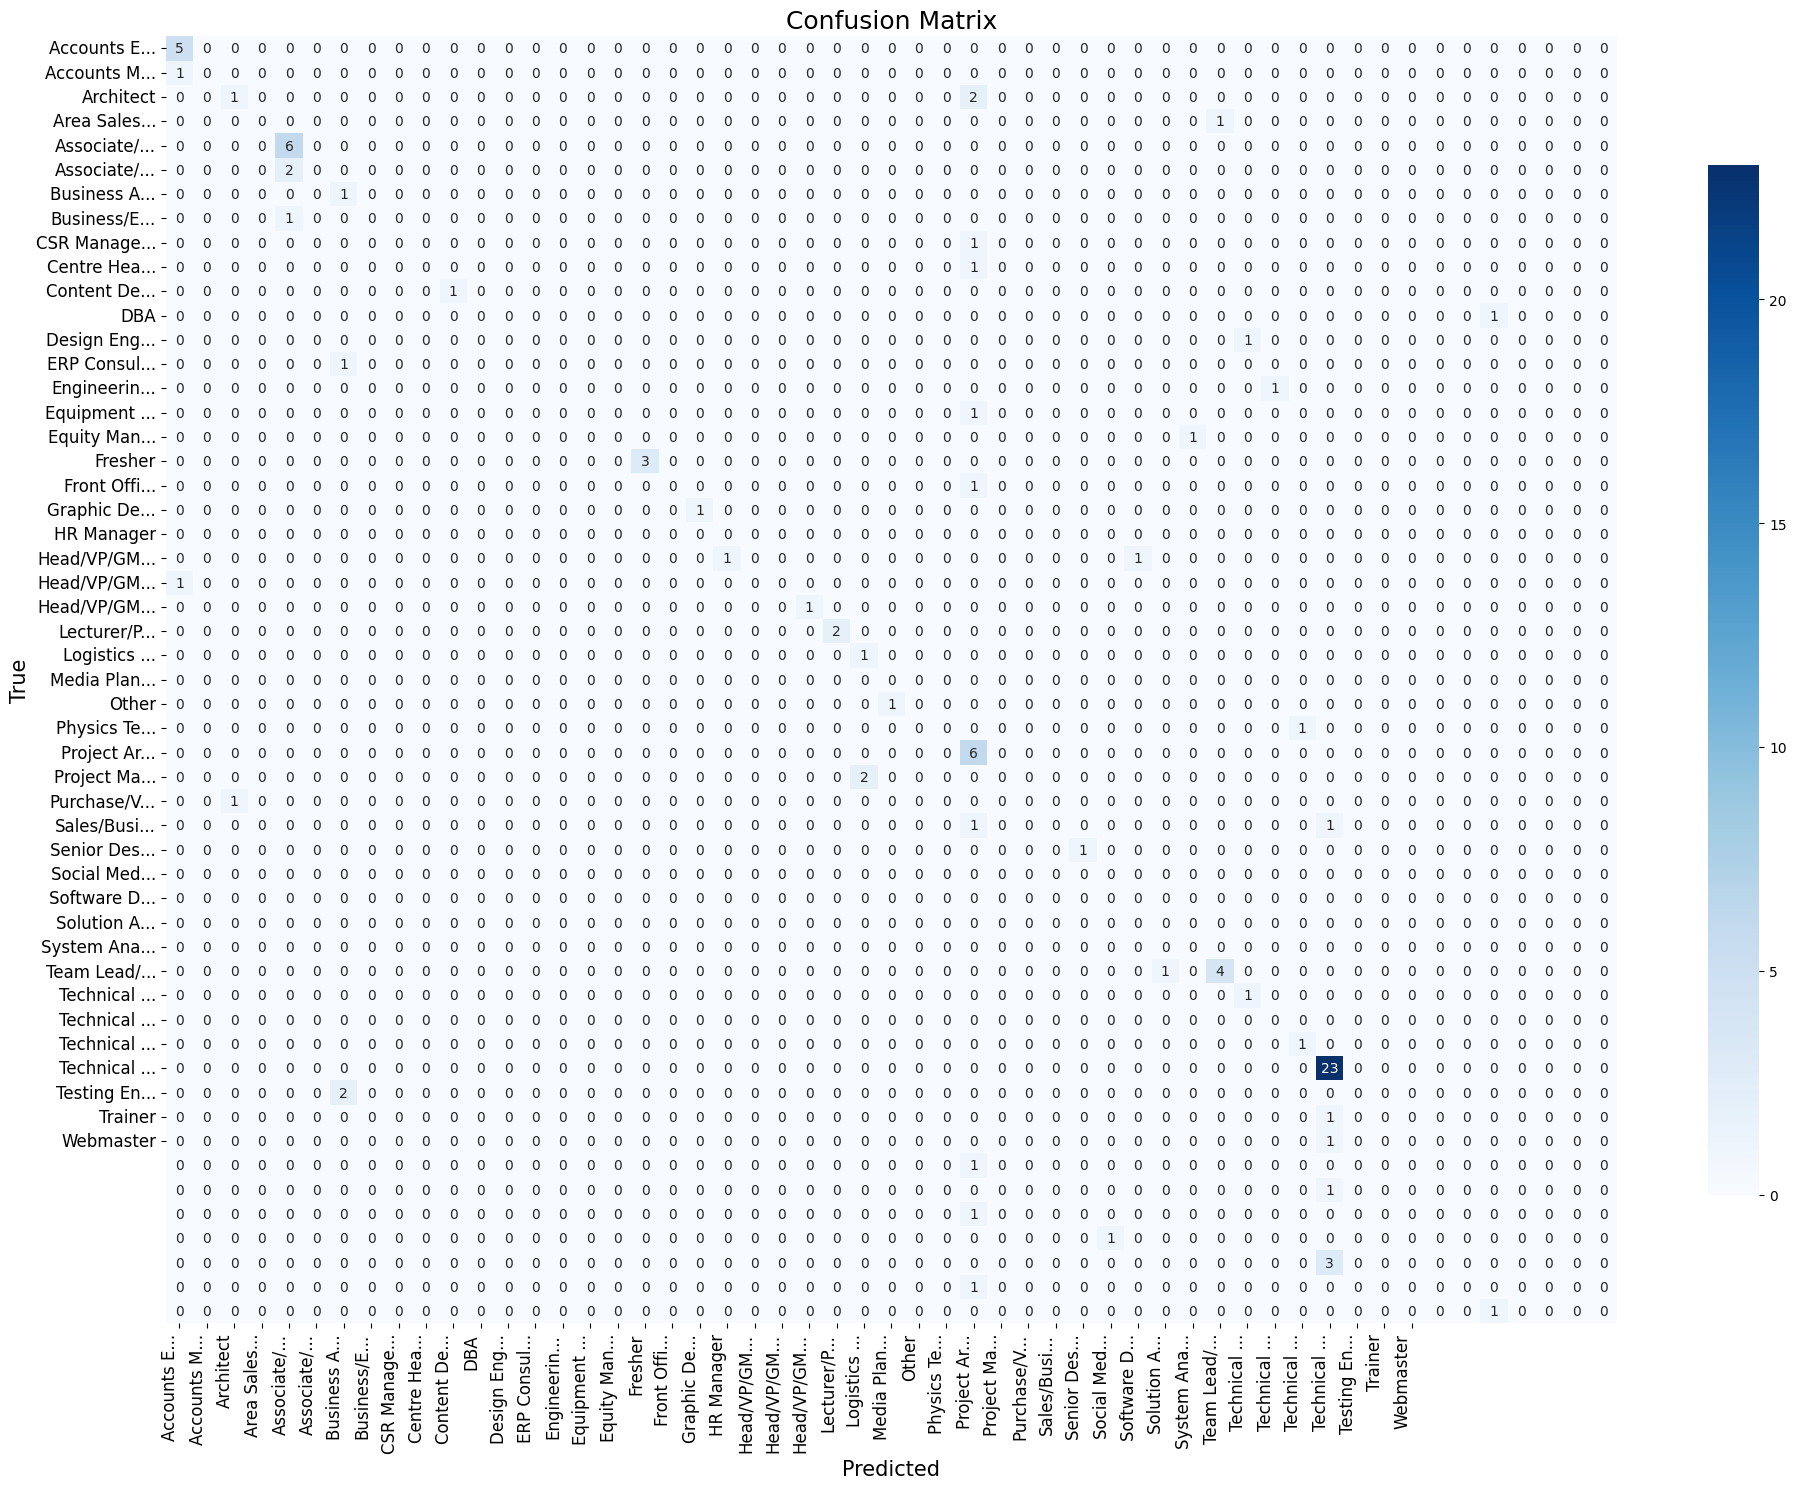

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


labels = [label[:10] + "..." if len(label) > 10 else label for label in sorted(y_test.unique())]


plt.figure(figsize=(20, 15))  
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, cbar_kws={"shrink": 0.8}) 


plt.xticks(fontsize=12, ha='right') 
plt.yticks(fontsize=12)


plt.xlabel("Predicted", fontsize=15)
plt.ylabel("True", fontsize=15)
plt.title("Confusion Matrix", fontsize=18)

plt.tight_layout() 
plt.show()

# GMM


In [ ]:
from collections import Counter
import numpy as np

from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, classification_report


n_roles = df_cleaned1['Role'].nunique()  # Number of unique roles
gmm = GaussianMixture(n_components=n_roles, random_state=42)
gmm.fit(X_train.toarray())

gmm_clusters = gmm.predict(X_test.toarray())


import numpy as np
from scipy.stats import mode


# Map clusters to roles using majority voting, with safeguards for empty clusters
cluster_to_role = {}
for cluster in range(n_roles):
    indices = np.where(gmm_clusters == cluster)
    true_labels = y_test.iloc[indices]
    
    if len(true_labels) > 0:
        # Use Counter to find the most common true label
        most_common_role = Counter(true_labels).most_common(1)[0][0]
        cluster_to_role[cluster] = most_common_role
    else:
        # Handle empty cluster by assigning a placeholder or skipping
        cluster_to_role[cluster] = None

# Map clusters to actual roles, handling unmapped clusters
gmm_pred_roles = [cluster_to_role[cluster] if cluster_to_role[cluster] is not None else "Unknown" for cluster in gmm_clusters]


print("Classification Report for GMM:")


report_dict = classification_report(y_test, gmm_pred_roles, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()


pd.set_option('display.max_colwidth', 100)
pd.set_option('display.expand_frame_repr', False)

print(report_df)

#Compute Adjusted Rand Index (ARI) for clustering
ari = adjusted_rand_score(y_test, gmm_pred_roles)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, gmm_pred_roles)

print(f"GMM Classification Accuracy: {accuracy:.4f}")

Classification Report for GMM:
                                                                                                      precision    recall  f1-score    support
Accounts Executive/Accountant                                                                          0.833333  1.000000  0.909091   5.000000
Accounts Manager                                                                                       0.000000  0.000000  0.000000   1.000000
Architect                                                                                              0.750000  1.000000  0.857143   3.000000
Area Sales Manager                                                                                     0.000000  0.000000  0.000000   1.000000
Associate/Senior Associate -(NonTechnical)                                                             0.750000  1.000000  0.857143   6.000000
Associate/Senior Associate -(Technical)                                                                0.000000

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Adjusted Rand Index (ARI): 0.7353
GMM Classification Accuracy: 0.8163


Heat Map

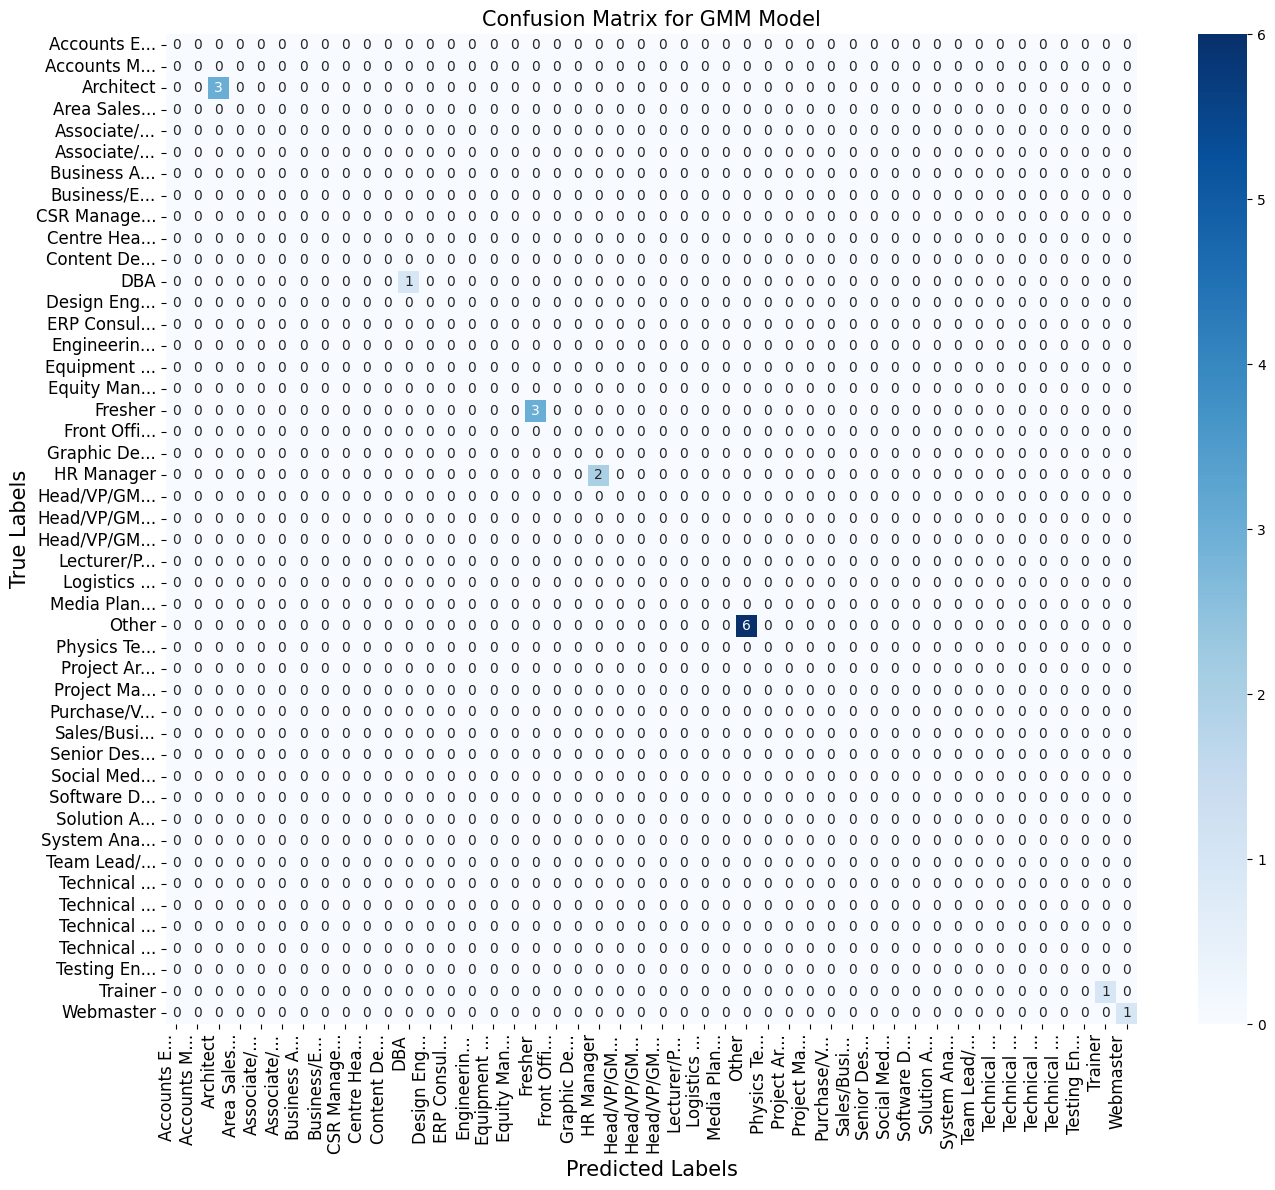

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

labels = [label[:10] + "..." if len(label) > 10 else label for label in sorted(y_test.unique())]



cm = confusion_matrix(y_test, gmm_pred_roles, labels=labels)


cm_df = pd.DataFrame(cm, index=labels, columns=labels)


plt.figure(figsize=(14, 12))  
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar={"shrink": 0.8})


plt.xticks(fontsize=12, ha='right') 
plt.yticks(fontsize=12)


plt.title("Confusion Matrix for GMM Model",fontsize=15)
plt.ylabel("True Labels",fontsize=15)
plt.xlabel("Predicted Labels",fontsize=15)

plt.tight_layout() 
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


y_knn = df_cleaned1['Role'] 
X_knn = combined_idf_vector


X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)


knn_model = KNeighborsClassifier(n_neighbors=5)  #
knn_model.fit(X_knn_train, y_knn_train)


y_knn_pred = knn_model.predict(X_knn_test)


print("KNN Classification Report:")
report_dict_knn = classification_report(y_knn_test, y_knn_pred, output_dict=True)

report_df_knn = pd.DataFrame(report_dict_knn).transpose()

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.expand_frame_repr', False)

print(report_df_knn)


accuracy_knn = accuracy_score(y_knn_test, y_knn_pred)
print(f"KNN Accuracy: {accuracy_knn:.4f}")


conf_matrix_knn = confusion_matrix(y_knn_test, y_knn_pred)
print("KNN Confusion Matrix:")
print(conf_matrix_knn)

KNN Classification Report:
                                                                                                      precision    recall  f1-score    support
Accounts Executive/Accountant                                                                          0.625000  1.000000  0.769231   5.000000
Accounts Manager                                                                                       0.000000  0.000000  0.000000   1.000000
Architect                                                                                              0.500000  0.333333  0.400000   3.000000
Area Sales Manager                                                                                     0.000000  0.000000  0.000000   1.000000
Associate/Senior Associate -(NonTechnical)                                                             0.666667  0.666667  0.666667   6.000000
Associate/Senior Associate -(Technical)                                                                0.500000  1.

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

Heat Map

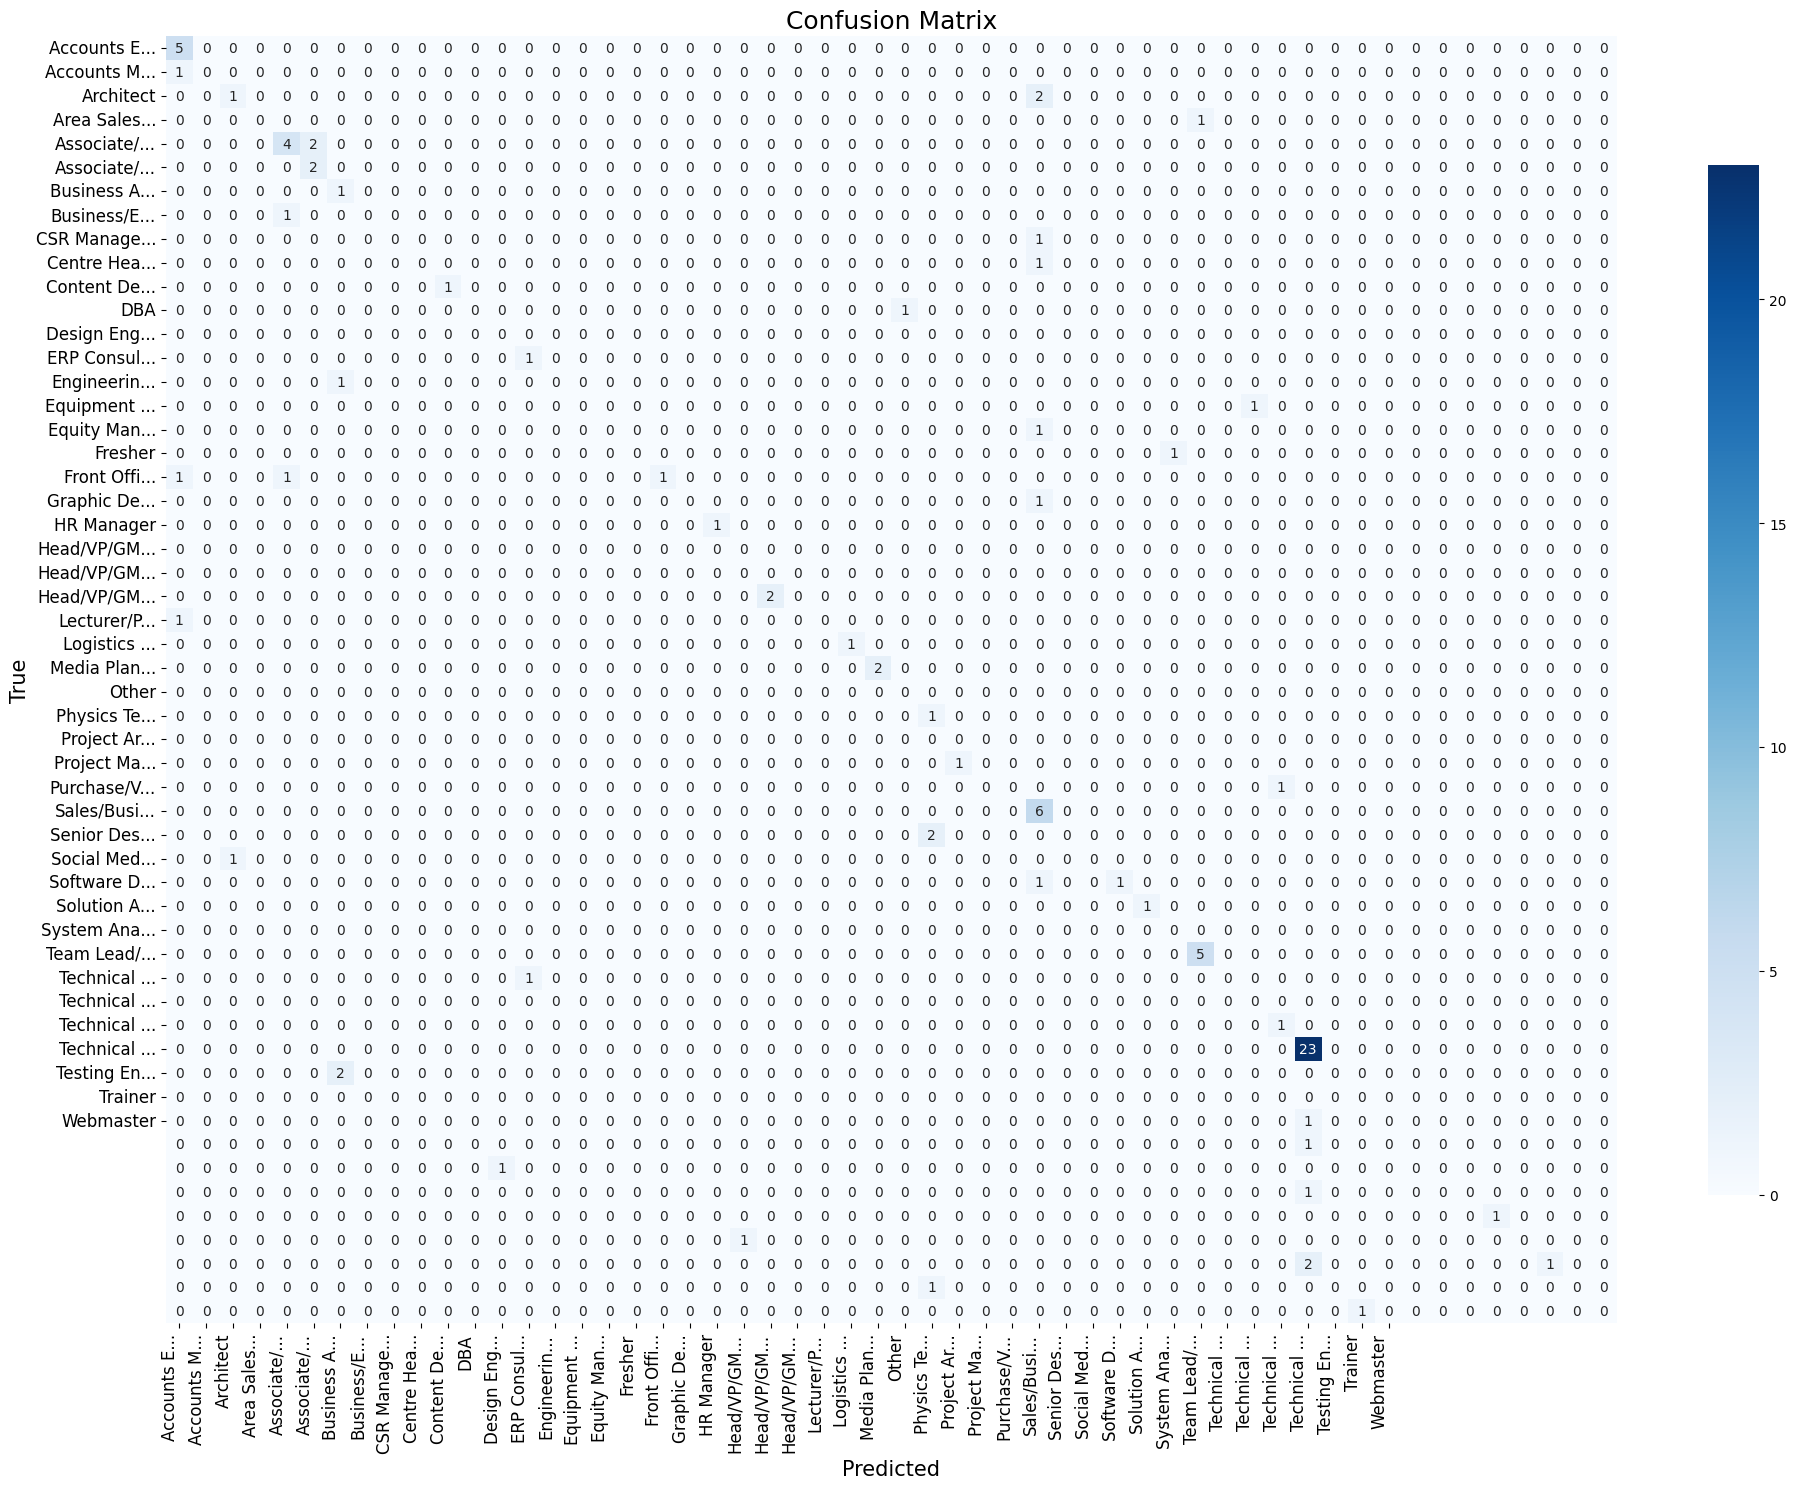

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


labels = [label[:10] + "..." if len(label) > 10 else label for label in sorted(y_knn_test.unique())]


plt.figure(figsize=(20, 15))  #
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, cbar_kws={"shrink": 0.8})  # Shrink color bar


plt.xticks(fontsize=12, ha='right')  
plt.yticks(fontsize=12)


plt.xlabel("Predicted", fontsize=15)
plt.ylabel("True", fontsize=15)
plt.title("Confusion Matrix", fontsize=18)

plt.tight_layout() 
plt.show()

KNN with PCA

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


y_knn = df_cleaned1['Role']  
X_knn = combined_idf_vector


X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality for KNN
pca_knn = PCA(n_components=0.85)
X_knn_train_pca = pca_knn.fit_transform(X_knn_train.toarray())
X_knn_test_pca = pca_knn.transform(X_knn_test.toarray())


knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_knn_train_pca, y_knn_train)


y_knn_pred = knn_model.predict(X_knn_test_pca)


print("KNN Classification Report:")
report_dict_knn = classification_report(y_knn_test, y_knn_pred, output_dict=True)


report_df_knn = pd.DataFrame(report_dict_knn).transpose()


pd.set_option('display.max_colwidth', 100)
pd.set_option('display.expand_frame_repr', False)

print(report_df_knn)


accuracy_knn = accuracy_score(y_knn_test, y_knn_pred)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

conf_matrix_knn_pca = confusion_matrix(y_knn_test, y_knn_pred)
print("KNN Confusion Matrix:")
print(conf_matrix_knn)

KNN Classification Report:
                                                                                                      precision    recall  f1-score    support
Accounts Executive/Accountant                                                                          0.833333  1.000000  0.909091   5.000000
Accounts Manager                                                                                       0.000000  0.000000  0.000000   1.000000
Architect                                                                                              0.000000  0.000000  0.000000   3.000000
Area Sales Manager                                                                                     0.000000  0.000000  0.000000   1.000000
Associate/Senior Associate -(NonTechnical)                                                             0.714286  0.833333  0.769231   6.000000
Associate/Senior Associate -(Technical)                                                                0.666667  1.

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

Heat Map


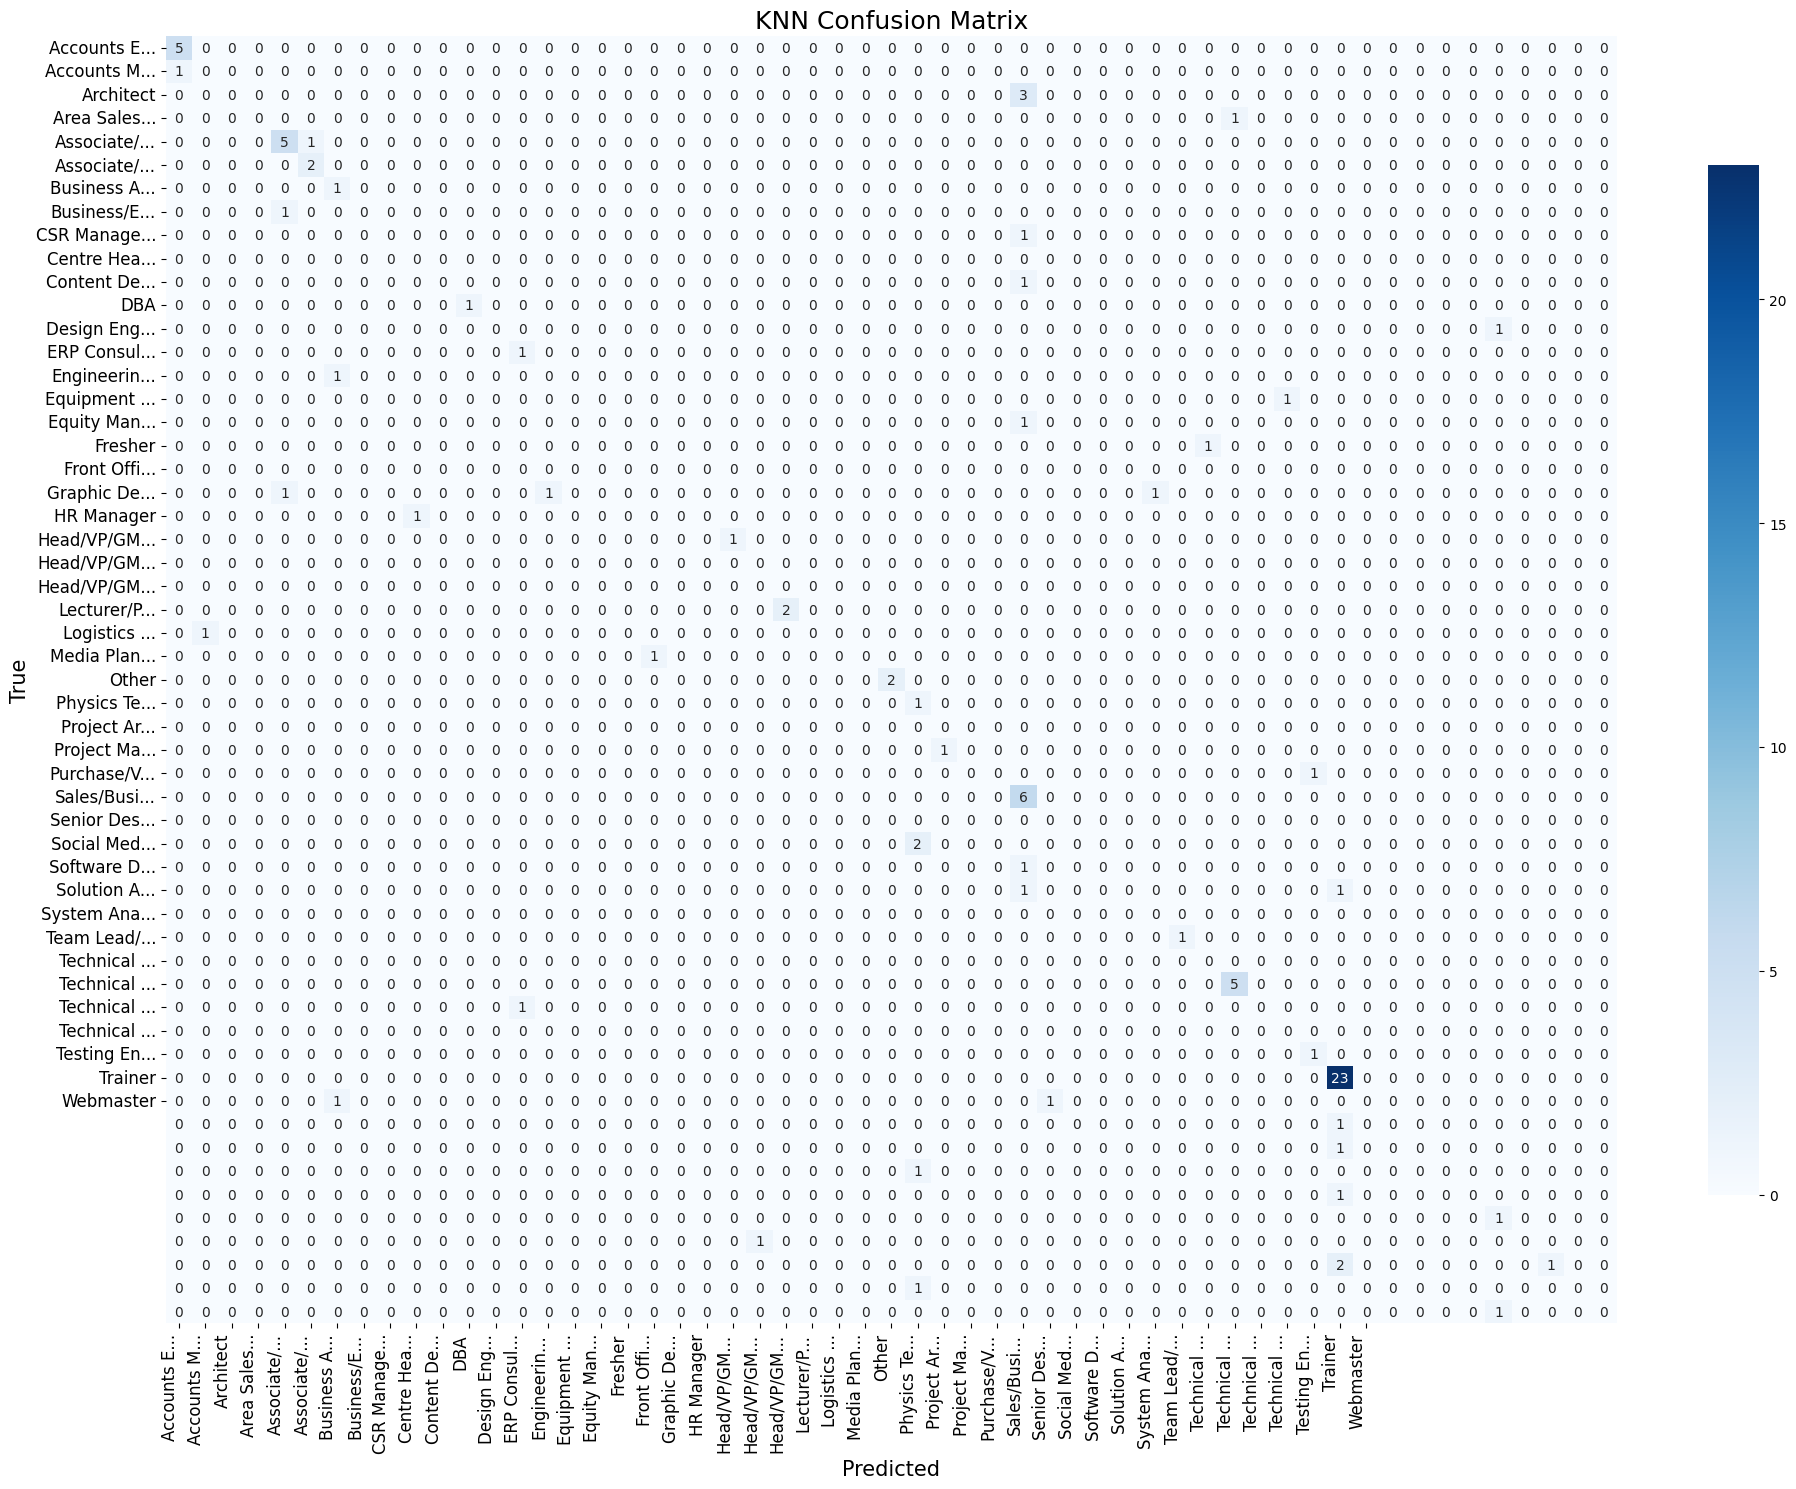

In [ ]:
labels_knn = [label[:10] + "..." if len(label) > 10 else label for label in sorted(y_knn_test.unique())]


plt.figure(figsize=(20, 15)) 
sns.heatmap(conf_matrix_knn_pca, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_knn, yticklabels=labels_knn, cbar_kws={"shrink": 0.8})  


plt.xticks(fontsize=12, ha='right')  
plt.yticks(fontsize=12)

plt.xlabel("Predicted", fontsize=15)
plt.ylabel("True", fontsize=15)
plt.title("KNN Confusion Matrix", fontsize=18)

plt.tight_layout()  
plt.show()